In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Afrotheria_out_iqtree_MF.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n61          1.6914 ( 1.5557,  1.9742) ( 1.5373,  1.9188)  0.3815 (Jnode 118)\n',
 't_n62          0.6793 ( 0.6442,  0.7244) ( 0.6418,  0.7204)  0.0786 (Jnode 117)\n',
 't_n63          0.6105 ( 0.5715,  0.6503) ( 0.5708,  0.6493)  0.0785 (Jnode 116)\n',
 't_n64          0.5509 ( 0.5077,  0.5886) ( 0.5099,  0.5901)  0.0802 (Jnode 115)\n',
 't_n65          0.5233 ( 0.4793,  0.5597) ( 0.4828,  0.5621)  0.0793 (Jnode 114)\n',
 't_n66          0.5070 ( 0.4620,  0.5442) ( 0.4642,  0.5460)  0.0818 (Jnode 113)\n',
 't_n67          0.3723 ( 0.3031,  0.4286) ( 0.3063,  0.4308)  0.1244 (Jnode 112)\n',
 't_n68          0.2540 ( 0.1753,  0.3267) ( 0.1817,  0.3323)  0.1506 (Jnode 111)\n',
 't_n69          0.1488 ( 0.0722,  0.2425) ( 0.0723,  0.2426)  0.1703 (Jnode 110)\n',
 't_n70          0.3444 ( 0.2733,  0.4049) ( 0.2778,  0.4076)  0.1298 (Jnode 109)\n',
 't_n71          0.2734 ( 0.1673,  0.3611) ( 0.1706,  0.3635)  0.1929 (Jnode 108)\n',
 't_n72          0.2557 ( 0.1666,  0.3370) ( 0.1684,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119']

In [6]:
posterior_mean_iqtree

[1.6914,
 0.6793,
 0.6105,
 0.5509,
 0.5233,
 0.507,
 0.3723,
 0.254,
 0.1488,
 0.3444,
 0.2734,
 0.2557,
 0.3639,
 0.2014,
 0.3444,
 0.3352,
 0.3402,
 0.2687,
 0.4866,
 0.4562,
 0.3997,
 0.0878,
 0.0756,
 0.042,
 0.3298,
 0.2956,
 0.2811,
 0.1654,
 0.0651,
 0.0462,
 0.1113,
 0.0404,
 0.3394,
 0.3747,
 0.2825,
 0.1824,
 0.1196,
 0.0275,
 0.0182,
 0.0109,
 0.0028,
 0.0621,
 0.0132,
 0.1025,
 0.0753,
 0.0332,
 0.0825,
 0.1663,
 0.1162,
 0.6076,
 0.5222,
 0.4165,
 0.2228,
 0.1246,
 0.0953,
 0.2545,
 0.1682,
 0.9659,
 0.5796]

In [7]:
lower_ci_iqtree

[1.5557,
 0.6442,
 0.5715,
 0.5077,
 0.4793,
 0.462,
 0.3031,
 0.1753,
 0.0722,
 0.2733,
 0.1673,
 0.1666,
 0.2656,
 0.1203,
 0.2481,
 0.2403,
 0.2515,
 0.1807,
 0.443,
 0.4099,
 0.3487,
 0.0376,
 0.0321,
 0.0151,
 0.2678,
 0.2328,
 0.2183,
 0.102,
 0.0293,
 0.0201,
 0.0446,
 0.0119,
 0.1865,
 0.3322,
 0.2279,
 0.1225,
 0.0735,
 0.0107,
 0.0063,
 0.0034,
 0.0004,
 0.0156,
 0.0003,
 0.0494,
 0.0286,
 0.0046,
 0.0331,
 0.0583,
 0.0273,
 0.5679,
 0.4783,
 0.3857,
 0.1867,
 0.0851,
 0.0346,
 0.1052,
 0.0592,
 0.2855,
 0.1064]

In [8]:
upper_ci_iqtree

[1.9742,
 0.7244,
 0.6503,
 0.5886,
 0.5597,
 0.5442,
 0.4286,
 0.3267,
 0.2425,
 0.4049,
 0.3611,
 0.337,
 0.4247,
 0.2951,
 0.4058,
 0.3978,
 0.4052,
 0.3307,
 0.5279,
 0.5019,
 0.4517,
 0.1559,
 0.1375,
 0.0904,
 0.3945,
 0.3648,
 0.3507,
 0.2436,
 0.1185,
 0.0894,
 0.1929,
 0.0911,
 0.4301,
 0.4341,
 0.3497,
 0.2507,
 0.1756,
 0.0543,
 0.0399,
 0.0254,
 0.0085,
 0.1326,
 0.0498,
 0.1683,
 0.1399,
 0.0849,
 0.1485,
 0.3079,
 0.2514,
 0.6483,
 0.5696,
 0.4606,
 0.2468,
 0.1646,
 0.1612,
 0.3421,
 0.2801,
 1.6498,
 1.3456]

In [9]:
file_mcmctree = open("Afrotheria_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

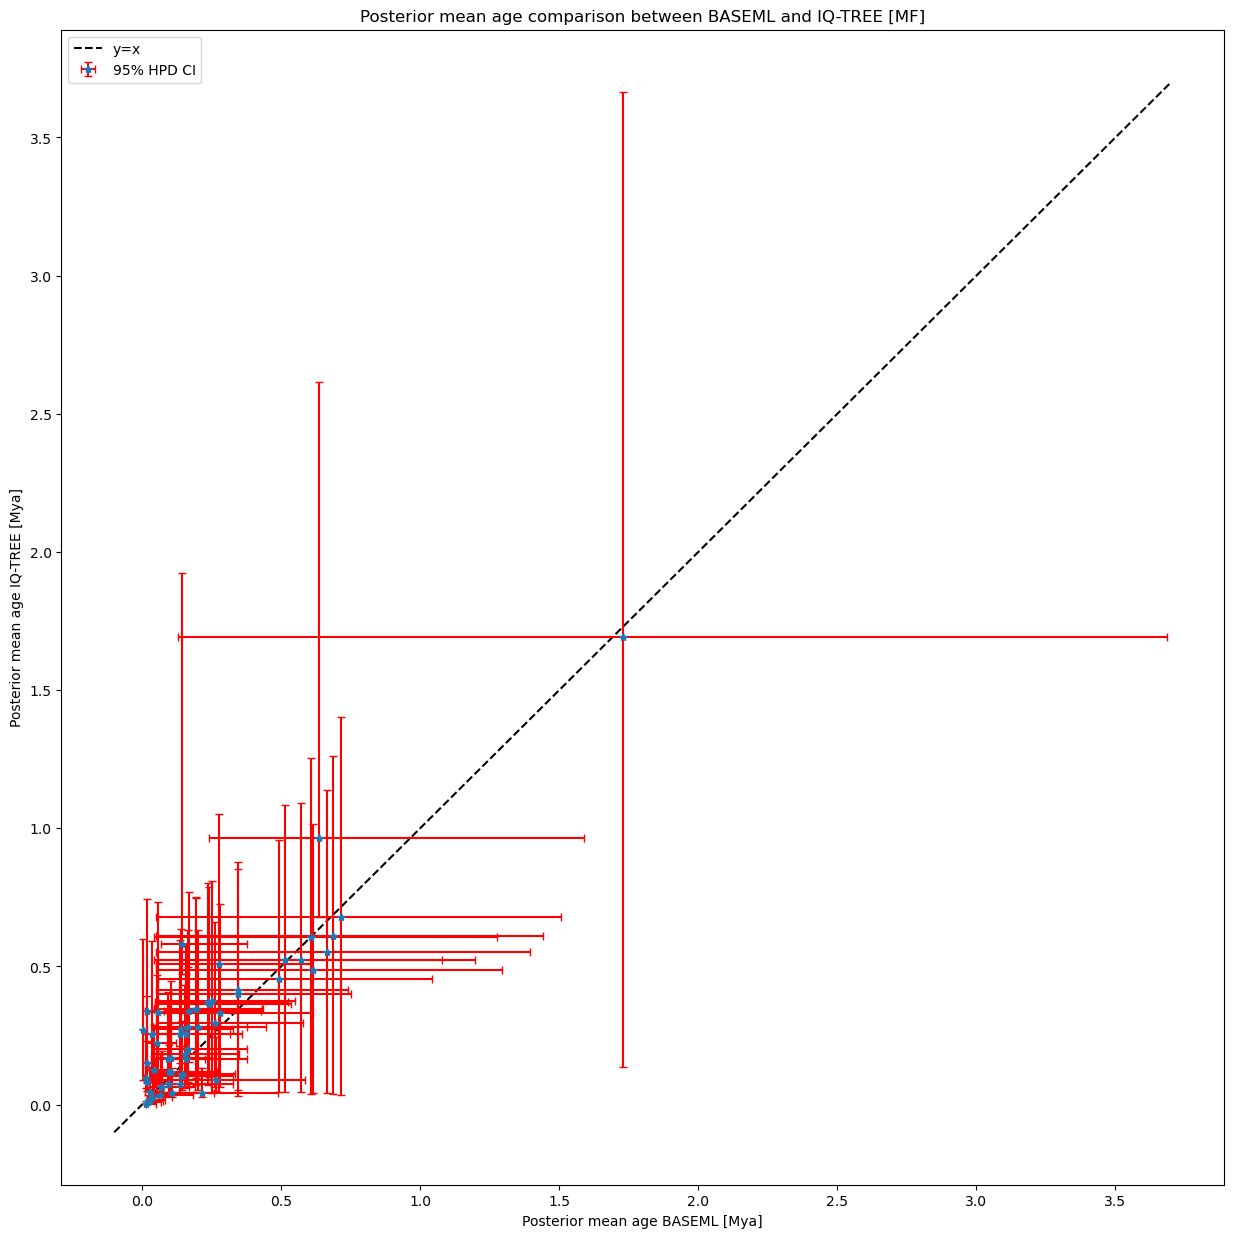

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.7], 
        [-0.1, 3.7], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./Afrotheria_posterior_mean_age_comparison_MF.png')

In [11]:
posterior_mean_baseml

[1.7291,
 0.7166,
 0.6858,
 0.6648,
 0.5147,
 0.2766,
 0.2356,
 0.1579,
 0.0168,
 0.1922,
 0.1401,
 0.0375,
 0.2409,
 0.1656,
 0.1928,
 0.0582,
 0.0183,
 0.0047,
 0.6157,
 0.4907,
 0.3464,
 0.2642,
 0.1359,
 0.2151,
 0.2792,
 0.2605,
 0.1646,
 0.094,
 0.0695,
 0.0294,
 0.1435,
 0.1082,
 0.1682,
 0.2509,
 0.1997,
 0.1537,
 0.1026,
 0.0383,
 0.0286,
 0.0214,
 0.0135,
 0.0709,
 0.0235,
 0.1431,
 0.0974,
 0.0632,
 0.0182,
 0.1564,
 0.0983,
 0.6083,
 0.5701,
 0.3441,
 0.0526,
 0.0413,
 0.0129,
 0.1347,
 0.1039,
 0.6356,
 0.1437]

In [12]:
posterior_mean_iqtree

[1.6914,
 0.6793,
 0.6105,
 0.5509,
 0.5233,
 0.507,
 0.3723,
 0.254,
 0.1488,
 0.3444,
 0.2734,
 0.2557,
 0.3639,
 0.2014,
 0.3444,
 0.3352,
 0.3402,
 0.2687,
 0.4866,
 0.4562,
 0.3997,
 0.0878,
 0.0756,
 0.042,
 0.3298,
 0.2956,
 0.2811,
 0.1654,
 0.0651,
 0.0462,
 0.1113,
 0.0404,
 0.3394,
 0.3747,
 0.2825,
 0.1824,
 0.1196,
 0.0275,
 0.0182,
 0.0109,
 0.0028,
 0.0621,
 0.0132,
 0.1025,
 0.0753,
 0.0332,
 0.0825,
 0.1663,
 0.1162,
 0.6076,
 0.5222,
 0.4165,
 0.2228,
 0.1246,
 0.0953,
 0.2545,
 0.1682,
 0.9659,
 0.5796]

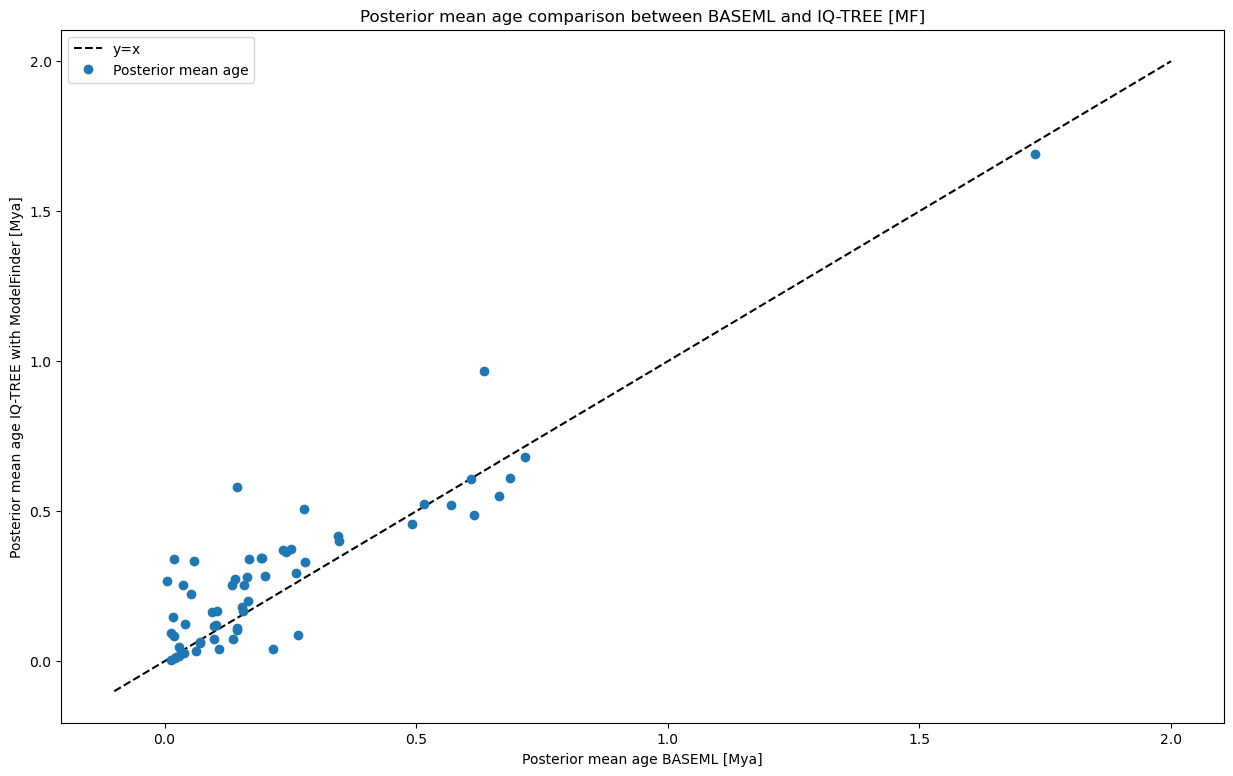

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./Afrotheria_posterior_mean_age_comparison_MF_scatter.png')